# 다중 선형회귀

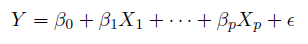

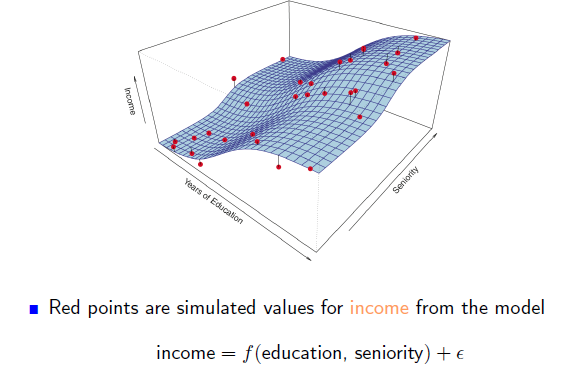

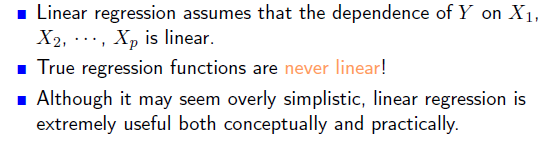

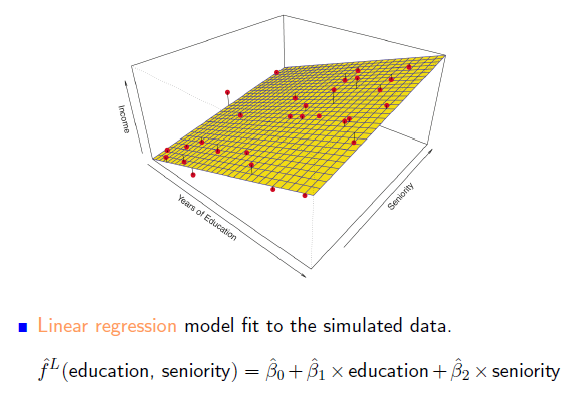

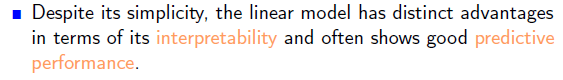

# LinearRegression 클래스 -Ordinary Least Squares

Linear Regression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares)추정 방식으로 구현한 클래싀이며, fit() method로 X,y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장한다

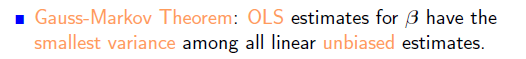

### class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=Flase, copy_X=True, n_jobs=1)

### 입력 파라미터
- fit_intercept : default는 True이다. Intercept(절편) 값을 계산할 것인지 말지를 지정하고, 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정된다.
- normalize : default는 False이다. fit_intercept가 False인 경우에는 이 파라미터가 무시되고, True이면 회귀를 수행하기 전에 입력 dataset을 정규화한다.

### 참고
- OLS 기반의 회귀 계수 계산은 입력 feature의 독립성에 많은 영향을 받는다. 
- feature 간의 상관관계가 매우 높은 경우 분산이 커져서 오류에 매우 민감해진다. 
- 이러한 현상으 공산성(multi-collinearity) 문제라고 한다. 
- 공산성의 문제가 발생하는 경우 변수 제거 또는 PCA등의 차원 축소의 전처리를 고려해볼 수 있다.

### 회귀 평가 지표

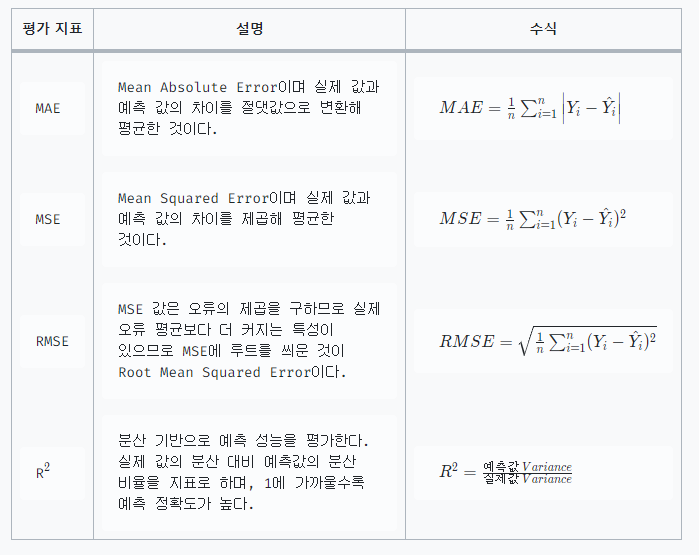

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

### 사이킷런에서 다운받을 수 있는 보스터 주택가격을 회귀로 모델링해본다

### 변수 설명
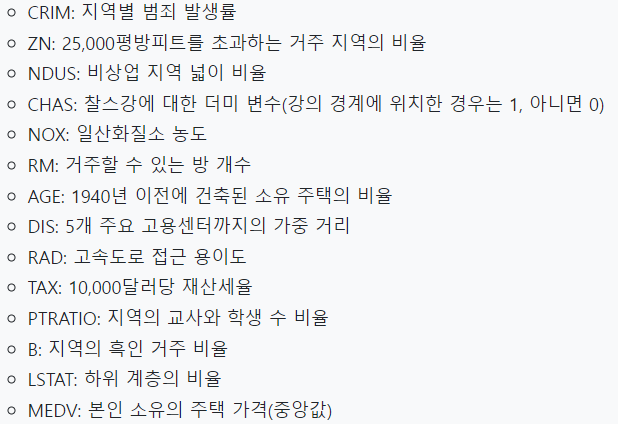

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 각 컬럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 살펴본다
- Seaborn의 regplot()을 이용해 X,Y축 값의 산점도와 함께 단순 선형 회귀 직선을 그려줌
- matplotlib.subplots()를 이용해 각 ax마다 컬럼과 PRICE와의 관계를 시각화


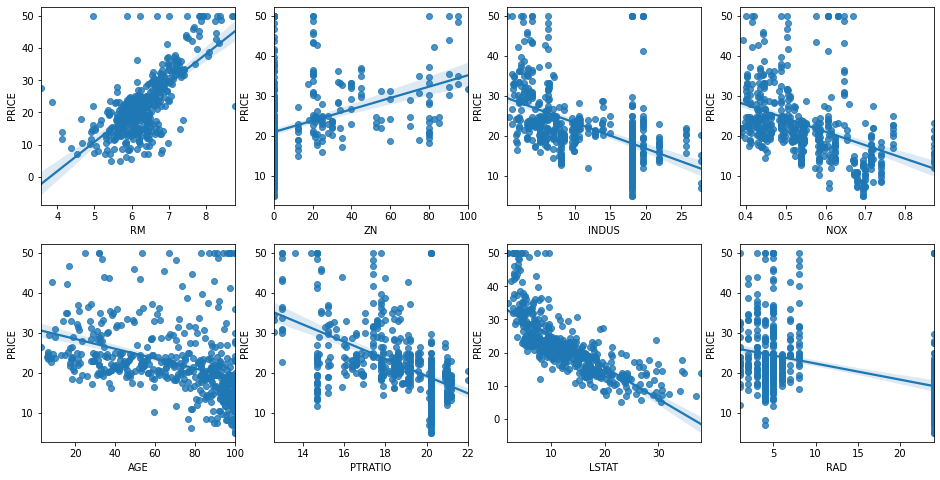

In [4]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

- RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다. 
- RM(방개수)은 양 방향의 선형성(Positive Linearity)이 가장 크다
- LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다,

### 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행
- MSE, RMSE, R2를 통해 모델을 평가한다

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = round(mean_squared_error(y_test, y_preds),5)
rmse = round(np.sqrt(mse),5)

print('MSE :',mse )
print('RMSE :',rmse )
print('R2 score :',r2_score(y_test, y_preds))

MSE : 17.29692
RMSE : 4.15896
R2 score : 0.7572263323138937


In [11]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164585
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [12]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- RM은 양의 값으로 회귀 계수가 가장 크다
- NOX 피처의 회귀 계수는 - 값이 너무 커보인다. 
- LSTAT은 그래프에 비행 덜한 관계성을 나타내는 계수를 가졌다

## Cross_Validation
- cross_val_score()를 이용해 교차 검증으로  MSE와 RMSE를 측정한다.
- cross_valu_score()에서는 RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야한다
- scoring='neg_mean_squared_error'를 지정하면 MSE에 -1을 곱한 값을 반환한다
- -1을 곱해서 MSE를 구하고 넘파이의 sqrt()를 사용해서 루트를 해주어 RMSE를 구한다

In [16]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 MSE scores: ', np.round(-1*neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE :  ',round(avg_rmse,2))

 5 folds 의 개별 MSE scores:  [12.46 26.05 33.07 80.76 33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE :   5.83
